In [85]:
import sympy as sp
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
sp.init_printing()


In [86]:
x = sp.Symbol('x',real=True)
k = sp.Symbol('k',real=True, positive=True)
a = sp.Symbol('a',real=True,positive=True)
n = sp.Symbol('n', integer=True, positive=True)
m = sp.Symbol('m', integer=True, positive=True)
h = sp.Symbol('hbar', integer=True, positive=True)
t = sp.Symbol('t', integer=True, positive=True)
psi = sp.Function('psi')


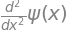

In [43]:
psi(x).diff(x,2)

In [44]:
-(k**2) * psi(x)

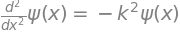

In [95]:
eq = sp.Eq(psi(x).diff(x,2), -(k**2) * psi(x))
eq

In [96]:
sp.dsolve(eq, psi(x), ics = {psi(0): 0})

In [45]:
res = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
res

In [46]:
res = res.rhs.subs({k: sp.pi * n / a})
res

In [47]:
sp.integrate(res**2, (x,0,a))

⎧  2               
⎪C₁ ⋅a      π⋅n    
⎪─────  for ─── ≠ 0
⎨  2         a     
⎪                  
⎪  0     otherwise 
⎩                  

In [76]:
psi = res.subs(sp.Symbol('C1'),sp.sqrt(2/a))    
psi

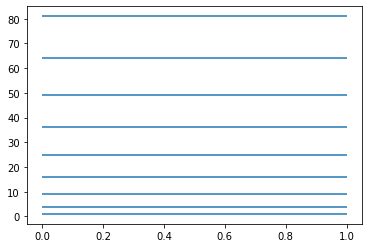

In [49]:
plt.hlines([n**2 for n in range(1,10)], xmin=0, xmax=1) 

In [97]:
psif = lambdify((x, n, a), psi)

TypeError: 'property' object is not iterable

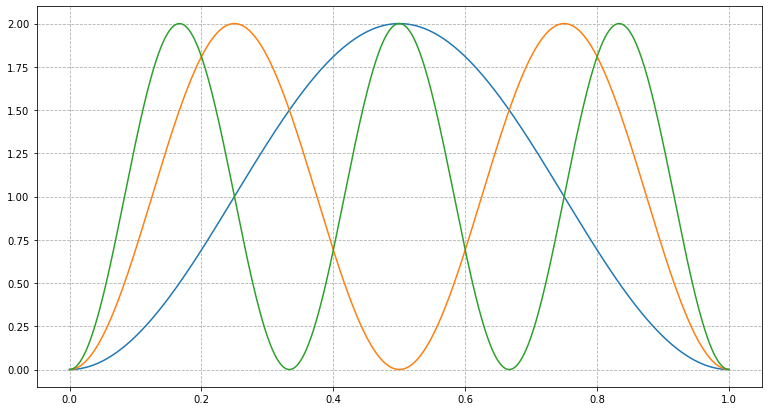

In [101]:
xs = np.linspace(0, 1, 1000)
plt.figure(figsize=(13,7))
plt.grid(linestyle='--')
plt.plot(xs,psif(xs, 1, 1)**2)
plt.plot(xs,psif(xs, 2, 1)**2)
plt.plot(xs,psif(xs, 3, 1)**2)

In [79]:
Psi = psi * sp.exp(-sp.I * n**2 * sp.pi**2 * h * t / (2 * m * a**2))
Psi

In [80]:
Psif = lambdify((x, t, n), Psi.subs({h: 1, m: 1, a: 1}))

In [99]:
n = 1
xs = np.linspace(0, 1, 1000)
fig = plt.figure(figsize=(13,7))

plt.xlim(0,1)
plt.ylim(-2,2)

line1, = plt.plot([],[])
line2, = plt.plot([],[])

plt.close()

dt = 0.01

def frame(i):
    t = i*dt
    ys = Psif(xs,t,n)
    line1.set_data(xs,ys.real)
    line2.set_data(xs,ys.imag)

    return line1, line2

anim = FuncAnimation(fig,frame,frames=100,interval=20,blit=True)
HTML(anim.to_jshtml())

In [94]:

xs = np.linspace(0, 1, 1000)
fig = plt.figure(figsize=(13,7))

plt.xlim(0,1)
plt.ylim(0,4)

line1, = plt.plot([],[])

plt.close()

dt = 0.01

def frame(i):
    t = i*dt
    ys = Psif(xs,t,1)/np.sqrt(2) + Psif(xs,t,2)/np.sqrt(2)
    ys = np.abs(ys)**2
    line1.set_data(xs,ys)

    return line1,

anim = FuncAnimation(fig,frame,frames=100,interval=20,blit=True)
HTML(anim.to_jshtml())